# Questão 9

In [41]:
import math
import random
import matplotlib.pyplot as plt

## Item 1 - Estimando o valor da Integral de g(x) = e^(-x^2)

In [42]:
# Definição da função g(x)
def g(x):    
    return math.e**(-x**2)

# Integração de g(x) pelo método de Monte Carlo
def MonteCarloIntegration(n, func):
    sum = 0
    
    for i in range(n):
        u = random.random()
        sum += func(u)

    return sum/n

print("Valor estimado para a integral de g(x) = e^(-x^2): ",MonteCarloIntegration(1000, g))

Valor estimado para a integral de g(x) = e^(-x^2):  0.7438697890869022


## Item 2 - Estimando o valor da Integral de g(x) = e^(-x^2), com Importance Sampling e h(x) = Ae^(-x)

In [43]:
# Definição da função h(x)
def h(x):
    return math.e**-x/((math.e - 1)/math.e)

# Função inversa de h(x) para gerar amostras da distribuição h(x)
def inverse_h(x):
    return 1 - math.log(math.e - x*(math.e - 1))

def importanceSamplingIntegration(n, g, h, inverse_h):
    sum = 0
    
    for i in range(n):
        u = random.random()
        sample_from_h = inverse_h(u)
        sum += g(sample_from_h)/h(sample_from_h)

    return sum/n

print("Valor estimado para a integral de g(x) = e^(-x^2) por Importance Sampling: ",importanceSamplingIntegration(1000, g, h, inverse_h))

Valor estimado para a integral de g(x) = e^(-x^2) por Importance Sampling:  0.7486028130991889


## Item 3 - Construindo os gráficos

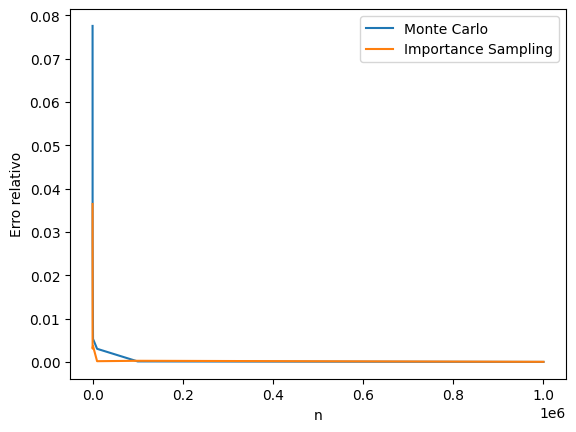

In [51]:
I = 0.7468241328124270253994674361318530053544996868126063290276544989

n_values = [ 10**(i + 1) for i in range(6)]


plt.ylabel("Erro relativo")
plt.xlabel("n")
plt.plot(n_values, [abs(MonteCarloIntegration(n, g) - I)/I for n in n_values], label="Monte Carlo")
plt.plot(n_values, [abs(importanceSamplingIntegration(n, g, h, inverse_h)- I)/I for n in n_values], label="Importance Sampling")
plt.legend()
plt.show()